# Load cleaned Topography

## Call from HDD

In [1]:
import numpy as np
import pandas as pd
arrSries  = pd.Series()
fns = ['2HTaSe2_bad_78K097','2HTaSe2_ap_118K002','2HTaSe2_bae_110K012','2HTaSe2_ao_115K037','test']

for fn in fns:
    arrSries[fn] = np.load(f'{fn}_cln.npy')

## Manually defined parameter

In [2]:
colors = ['#9467bd','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
nms = ['78K(1)', '118K', '110K', '115K','78K(2)']
Ts = [78, 118, 110, 115,78]
nano = [160,40,80,40,80]
sz = [2048,512,1024,1024,2048]
pxl20nms = [int((sz[idt] / nano[idt]) * 20) for idt in range(len(fns))]
cntrs = [np.array(arrSries[fn].shape)//2 for fn in fns]


In [3]:
df = pd.DataFrame({
    'fns': fns,
    'colors': colors,
    'nms': nms,
    'Ts': Ts,
    'nano': nano,
    'sz': sz
    ,'pxl20nm': pxl20nms
    ,'cntrs': cntrs
})
df

,fns,colors,nms,Ts,nano,sz,pxl20nm,cntrs
0,2HTaSe2_bad_78K097,#9467bd,78K(1),78,160,2048,256,"[1024, 1024]"
1,2HTaSe2_ap_118K002,#1f77b4,118K,118,40,512,256,"[256, 256]"
2,2HTaSe2_bae_110K012,#ff7f0e,110K,110,80,1024,256,"[512, 512]"
3,2HTaSe2_ao_115K037,#2ca02c,115K,115,40,1024,512,"[512, 512]"
4,test,#d62728,78K(2),78,80,2048,512,"[1024, 1024]"


# Topography

In [4]:
from useful import *
tab = subtabSr(arrSries)

d:\github\2H_TaSe2_Tc_STM\2Hvenv\Lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


## Topography:large,tab

In [5]:
# tab


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
idts = [0,4,2,3,1]
x0, y0 = 250, 100
x0_, y0_ = 350, 50
x0s = [x0_,x0,x0,x0,x0]
y0s = [y0_,y0,y0,y0,y0]

# fig,axs = plt.subplots(2,5,figsize=(15,6))
# for idt,isb,x0,y0 in zip(idts,range(len(idts)),x0s,y0s):
#     ax = axs[0,isb]
#     plt.sca(ax)    
#     arr = arrSries[fns[idt]]
#     plt.imshow(arr,cmap='afmhot')
#     auto199()
#     tickoff()
#     ax.set_title(df['nms'][idt])
#     pxl20nm = int((sz[idt]/nano[idt]) *20)
#     if isb == 0:
#         ax.set_ylabel('full image')
    
#     ax = axs[1,isb]
#     plt.sca(ax)    
#     plt.imshow(arr,cmap='afmhot')
#     auto199()
#     tickoff()    
#     ax.set_xlim(x0,pxl20nm+x0)
#     ax.set_ylim(pxl20nm+y0,y0)
#     # ax.
#     if isb == 0:
#         ax.set_ylabel('20x20 nm$^2$')
# from matplotlib.patches import Rectangle
# for idt, isb, x0, y0 in zip(idts, range(len(idts)), x0s, y0s):
#     ax = axs[0, isb]
#     pxl20nm = int((sz[idt] / nano[idt]) * 20)
#     rect = Rectangle((x0, y0), pxl20nm, pxl20nm, linewidth=1, edgecolor='r', facecolor='none')
#     ax.add_patch(rect)
# plt.suptitle('2H-TaSe2 STM topography by temperature')


# FFT

## manual define peak

### fcns

In [7]:
import imagingPhase.ffts as imfft

imagingPhase package loaded


In [8]:
vmin = 0 # @param
vmax = 0.0000001 # @param
threshold = 0#0.0000000001 # @param
choose = [0] # @param

In [9]:
chooses = [
    [7,8,11],
    [1,4,3],
    [1,4,7],
    [1,2,5],
    [7,2,5]
]

In [10]:
%matplotlib inline
arrsz =[]
ffts = []
pk_chooses = []
for fn,choose in zip(fns,chooses):
    arr_cln = arrSries[fn]
    arrsz.append(arr_cln.shape)
    fft2abs = imfft.fft2show(arr_cln,vmin,vmax)
    pk_choose,pk_all = imfft.fft2pkfnd(fft2abs,threshold,choose)
    pk_chooses.append(pk_choose)
    ffts.append(plt.gcf()) 
    plt.close()
        

[[1138 1547]
 [ 494  847]
 [1450  679]]
3
[[274 398]
 [111 208]
 [382 162]]
3
[[559 793]
 [216 417]
 [763 327]]
3
[[543 654]
 [363 464]
 [630 418]]
3
[[1076 1282]
 [ 747  937]
 [1249  854]]
3


In [11]:
pk_chooses

[array([[ 114.,  523.],
        [-530., -177.],
        [ 426., -345.]]),
 array([[  18.,  142.],
        [-145.,  -48.],
        [ 126.,  -94.]]),
 array([[  47.,  281.],
        [-296.,  -95.],
        [ 251., -185.]]),
 array([[  31.,  142.],
        [-149.,  -48.],
        [ 118.,  -94.]]),
 array([[  52.,  258.],
        [-277.,  -87.],
        [ 225., -170.]])]

In [12]:
# %matplotlib qt
# subtabs(ffts,fns)

# get phase map

In [13]:
import imagingPhase.get_phimap as gpm  

(<Figure size 1000x1000 with 8 Axes>,
 array([[<Axes: title={'center': 'Re'}>, <Axes: title={'center': 'Img'}>],
        [<Axes: title={'center': 'theta'}>,
         <Axes: title={'center': 'radial'}>]], dtype=object))

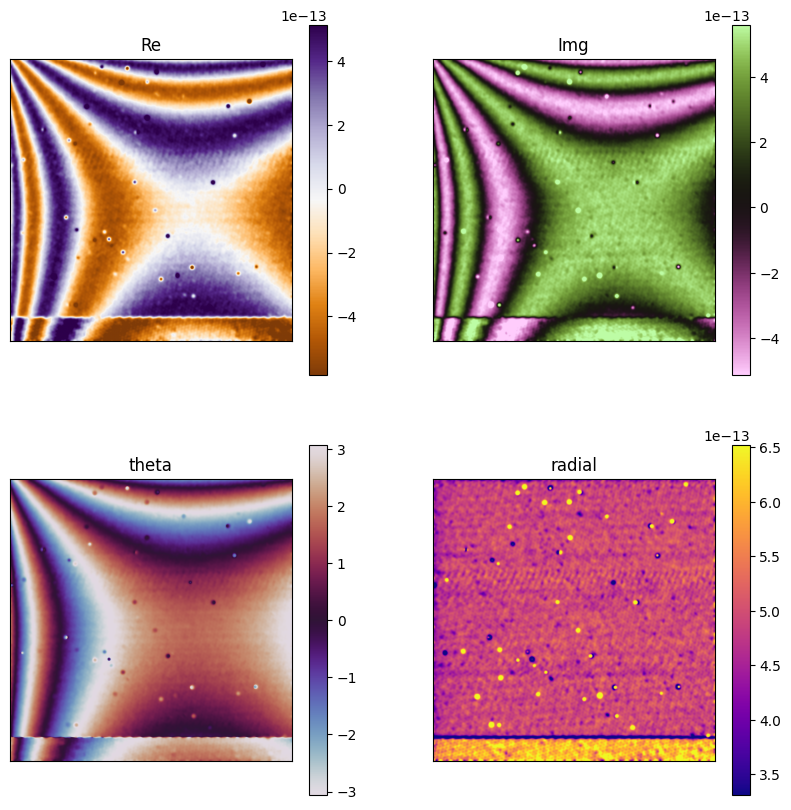

In [14]:
idt = 4
ik = 2
arr = arrSries[fns[idt]]
k = pk_chooses[idt][ik]
xprod = gpm.kdisplacementmap(arr,k,10)
gpm.visxprod(xprod)

In [15]:
unwrap_phase = gpm.unwrap_phase
kdisplacementmap = gpm.kdisplacementmap

In [16]:
idt = 4

In [17]:
sig = 10
arr = arrSries[fns[idt]]
pk_choose = pk_chooses[idt]

In [18]:
gpm.phi2Hrecover(arr, pk_choose, sig)

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [ ]:
# ks_Latt = pk_choose
# ks_CDW = pk_choose/3

# angle_restores = []
# for ik in range(3):
#   k_Latt = ks_Latt[ik]
#   k_CDW = ks_CDW[ik]
#   angle_restore = (
#   unwrap_phase(np.angle(kdisplacementmap(arr_cln,k_CDW,sig)))
#    - unwrap_phase(np.angle(kdisplacementmap(arr_cln,k_Latt,sig)))/3)
#   angle_restores.append(angle_restore)

In [ ]:
# def calculate_unwrapped_phase(arr, k, sigma):
#     """Calculates the unwrapped phase from a k-displacement map."""
#     displacement_map = kdisplacementmap(arr, k, sigma)
#     return unwrap_phase(np.angle(displacement_map))

# angle_restores = [
#     calculate_unwrapped_phase(arr_cln, k_CDW, sig) - 
#     calculate_unwrapped_phase(arr_cln, k_Latt, sig) / 3
#     for k_Latt, k_CDW in zip(ks_Latt, ks_CDW)
# ]